In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zomato-data-.csv')

In [4]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [10]:
for col in data.columns:
  if col!="name":
    print("No of unique values in",col,data[col].nunique())
    print("Unique values in ",col,data[col].unique())
    print("*" * 150)

No of unique values in online_order 2
Unique values in  online_order ['Yes' 'No']
******************************************************************************************************************************************************
No of unique values in book_table 2
Unique values in  book_table ['Yes' 'No']
******************************************************************************************************************************************************
No of unique values in rate 20
Unique values in  rate ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' '2.9/5' '3.5/5' '2.6/5'
 '3.8 /5' '3.4/5']
******************************************************************************************************************************************************
No of unique values in votes 90
Unique values in  votes [ 775  787  918   88  166  286    8 2556  324  504  402  150  164  424
   90  133  144   93   13   62  180   28 

In [13]:
# Extract the numeric part and convert to float
data['rating'] = data['rate'].str.extract(r'(\d+\.\d+)').astype(float)
data.drop(columns=['rate'],inplace=True)

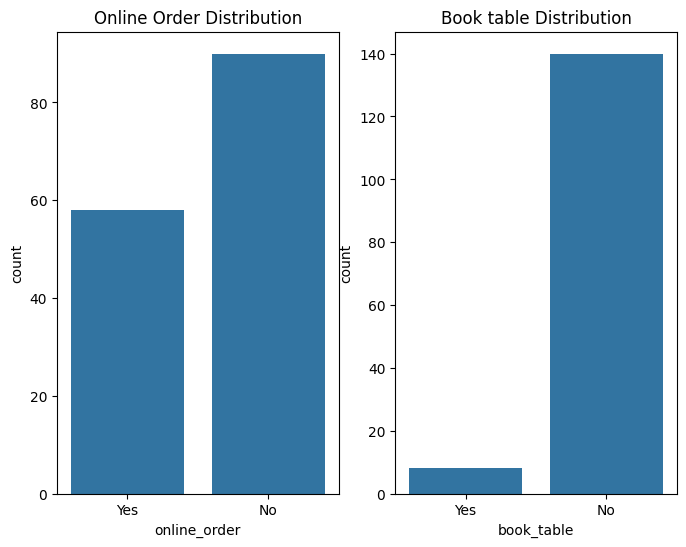

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
sns.countplot(data=data, x='online_order', ax=axes[0])
axes[0].set_title('Online Order Distribution')
sns.countplot(data=data, x='book_table', ax=axes[1])
axes[1].set_title('Book table Distribution')
plt.show()

Text(0.5, 1.0, 'listed_in Distribution')

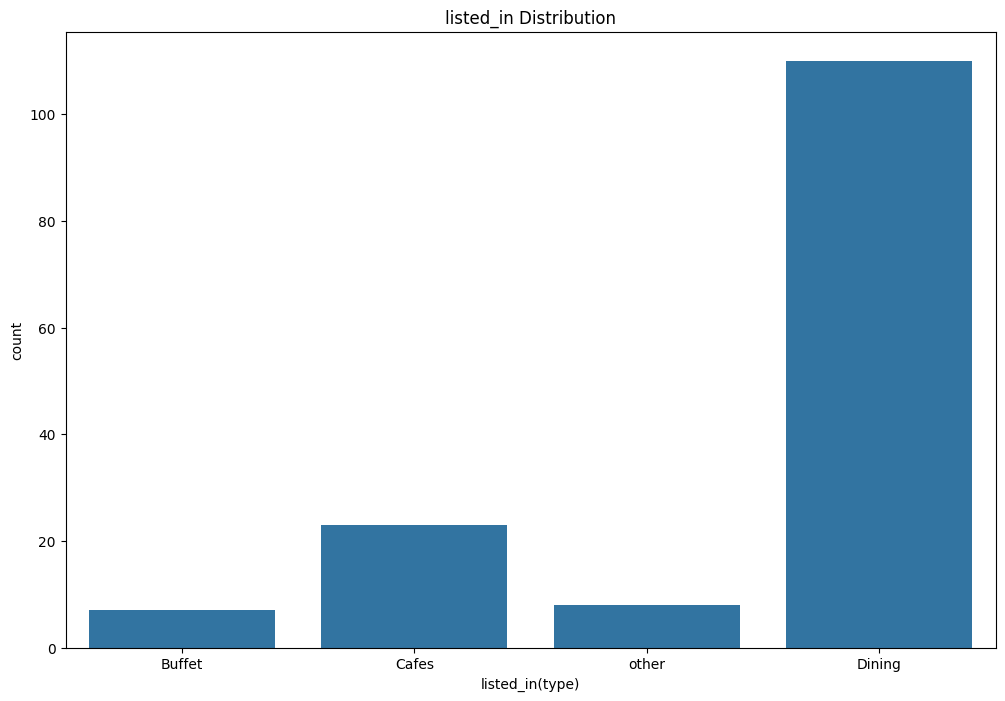

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='listed_in(type)')
plt.title('listed_in Distribution')

Text(0.5, 1.0, 'Rating vs Cost Price')

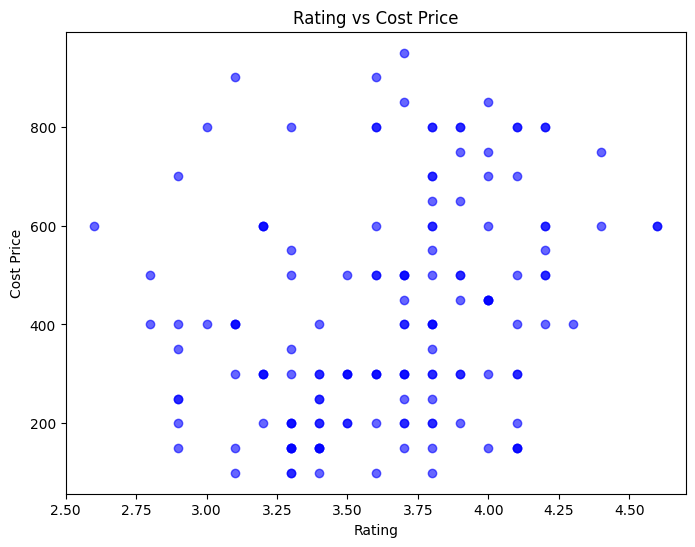

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(data['rating'], data["approx_cost(for two people)"], alpha=0.6, color='blue')
# Labels and title
plt.xlabel("Rating")
plt.ylabel("Cost Price")
plt.title("Rating vs Cost Price")

Text(0.5, 1.0, 'approx_cost(for two people) vslisted_in(type)')

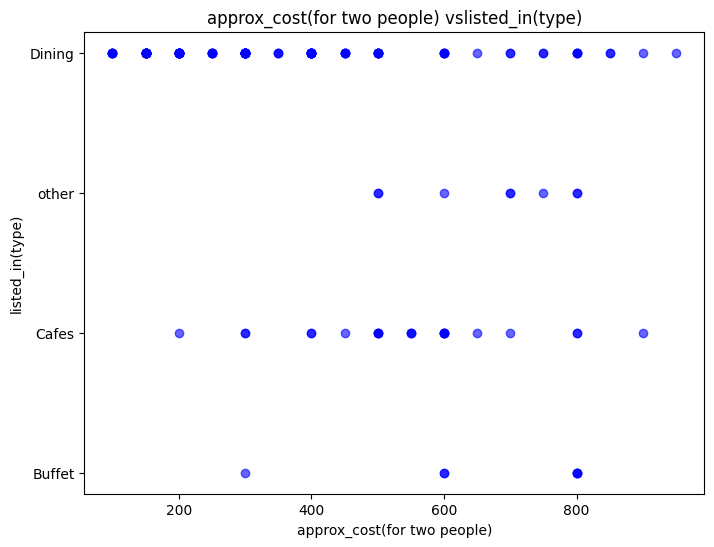

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(data['approx_cost(for two people)'], data["listed_in(type)"], alpha=0.6, color='blue')
# Labels and title
plt.xlabel("approx_cost(for two people)")
plt.ylabel("listed_in(type)")
plt.title("approx_cost(for two people) vslisted_in(type)")

In [50]:
from sklearn.preprocessing import LabelEncoder
y=data.drop(columns="name")
le=LabelEncoder()
for col in y.columns:
  if y[col].dtype=="object":
    y[col]=le.fit_transform(y[col])

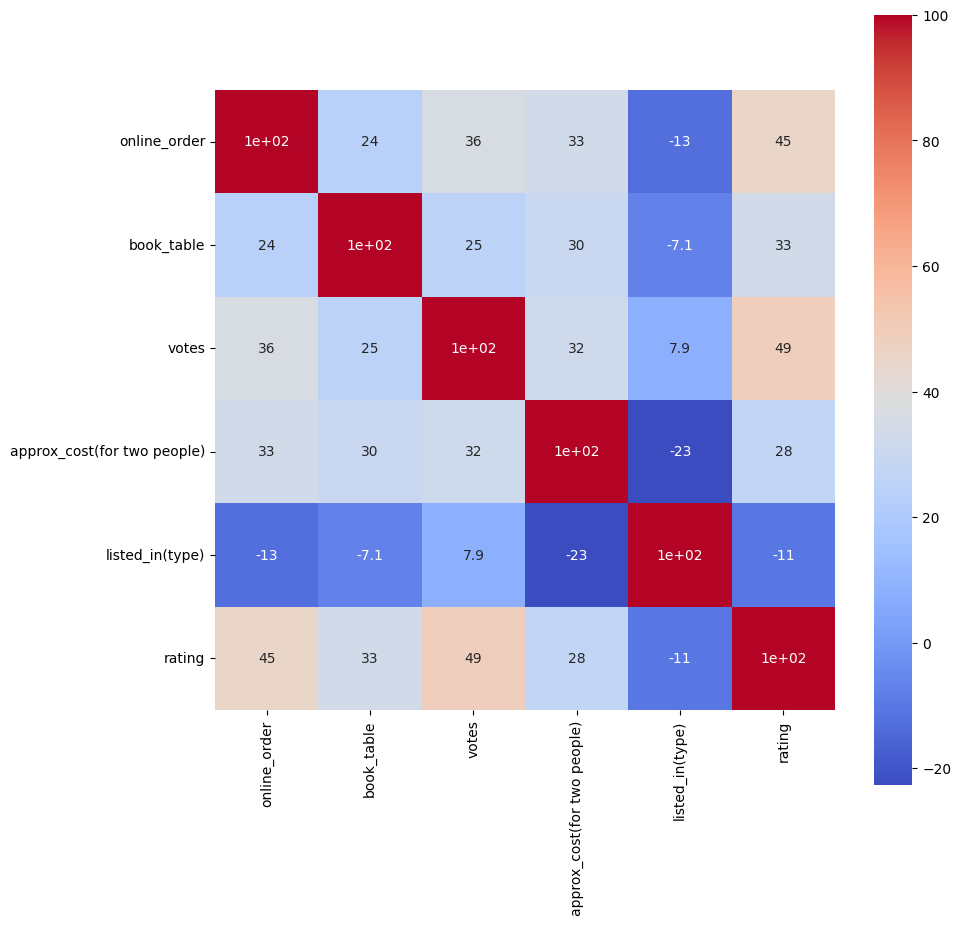

In [52]:
corr=y.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr*100,annot=True, cmap="coolwarm",square=True)
plt.show()